In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cell 1: Load data
purchase_behaviour_df = pd.read_csv('purchase_behaviour.csv')
transaction_data_df = pd.read_csv('transaction_data.csv')

# Display initial rows to understand the structure
print(purchase_behaviour_df.head())
print(transaction_data_df.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [4]:
# Cell 2: Check for missing values
print(purchase_behaviour_df.isnull().sum())
print(transaction_data_df.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [5]:
# Cell 3: Remove duplicates if any
purchase_behaviour_df.drop_duplicates(inplace=True)
transaction_data_df.drop_duplicates(inplace=True)

In [6]:
# Cell 4: Merge datasets on LYLTY_CARD_NBR
merged_df = pd.merge(transaction_data_df, purchase_behaviour_df, on='LYLTY_CARD_NBR', how='inner')

In [7]:
# Cell 5: Calculate Total Sales per Product
product_sales = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

# Identify Top 3 Most Profitable Products
top_3_products = product_sales.head(3)
print("Top 3 Most Profitable Products:")
print(top_3_products)

Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


C:\Users\tharu\AppData\Local\Temp\ipykernel_20564\2601468479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_products, x='TOT_SALES', y='PROD_NAME', palette='viridis')


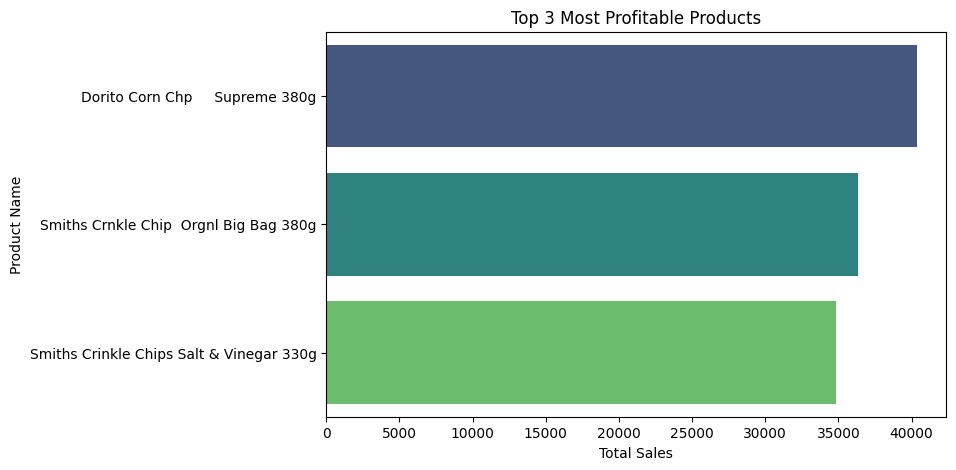

In [8]:
# Cell 6: Visualize Top 3 Products
plt.figure(figsize=(8,5))
sns.barplot(data=top_3_products, x='TOT_SALES', y='PROD_NAME', palette='viridis')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

Most Loyal Customers:
       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
59694          226000         OLDER FAMILIES          Premium    1300.00
60925          230078         OLDER FAMILIES           Budget     138.60
17292           63197         OLDER FAMILIES           Budget     132.80
69017          259009  OLDER SINGLES/COUPLES       Mainstream     127.20
42813          162039         OLDER FAMILIES       Mainstream     126.80
16001           58361         YOUNG FAMILIES           Budget     124.80
61001          230154         OLDER FAMILIES           Budget     124.40
25958           94185         YOUNG FAMILIES          Premium     122.80
35338          130090         YOUNG FAMILIES           Budget     122.65
47959          179228         YOUNG FAMILIES           Budget     120.80


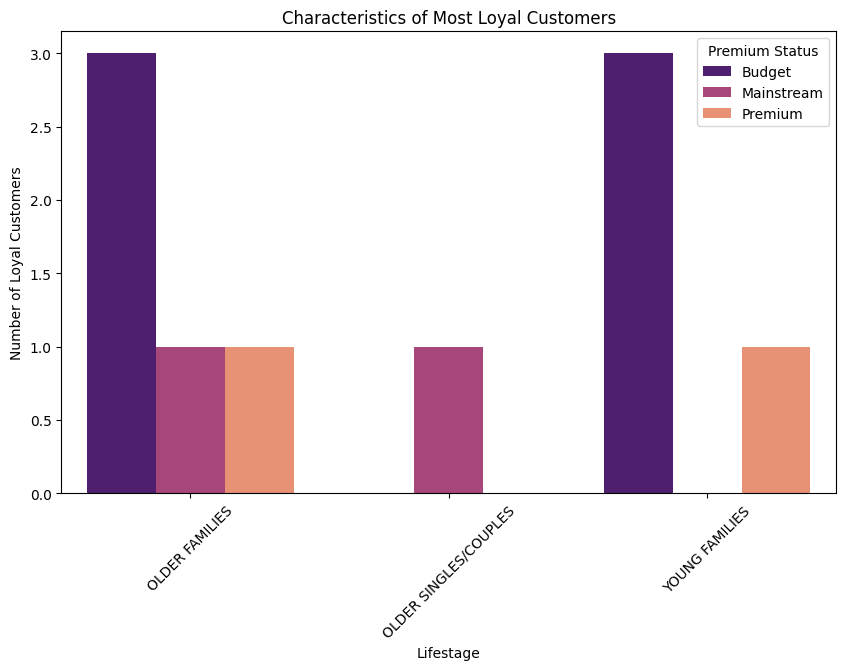

In [9]:
# Cell 7: Analyze Loyal Customers
# Identify the most loyal customers (highest spending)
customer_spending = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
most_loyal_customers = customer_spending.sort_values(by='TOT_SALES', ascending=False).head(10)

print("Most Loyal Customers:")
print(most_loyal_customers)

# Analyze Characteristics of Loyal Customers
loyal_customer_traits = most_loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')

# Visualize Customer Segments
plt.figure(figsize=(10,6))
sns.barplot(data=loyal_customer_traits, x='LIFESTAGE', y='Count', hue='PREMIUM_CUSTOMER', palette='magma')
plt.title('Characteristics of Most Loyal Customers')
plt.xlabel('Lifestage')
plt.ylabel('Number of Loyal Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Status')
plt.show()

In [10]:
# Cell 8: State Hypothesis
print("Hypothesis:")
print("Loyal customers tend to belong to specific lifestages, such as Young Families or Older Couples, and are more likely to be Premium customers. This could be due to higher disposable income or brand loyalty factors driving repeated purchases.")

Hypothesis:
Loyal customers tend to belong to specific lifestages, such as Young Families or Older Couples, and are more likely to be Premium customers. This could be due to higher disposable income or brand loyalty factors driving repeated purchases.


In [11]:
# Final Output: Top 3 Products and Loyal Customer Characteristics
print("\nFinal Summary:")
print("Top 3 Most Profitable Products:")
print(top_3_products)

print("\nCharacteristics of Our Most Loyal Customers:")
print(loyal_customer_traits)



Final Summary:
Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Characteristics of Our Most Loyal Customers:
               LIFESTAGE PREMIUM_CUSTOMER  Count
0         OLDER FAMILIES           Budget      3
1         OLDER FAMILIES       Mainstream      1
2         OLDER FAMILIES          Premium      1
3  OLDER SINGLES/COUPLES       Mainstream      1
4         YOUNG FAMILIES           Budget      3
5         YOUNG FAMILIES          Premium      1
